# KNN : NEAREST NEIGHBOUR
### CLASSIFICATION ALGORITHM

Abstract: The dataset concerns with the classification of two mental stages from recorded EEG signals: Planning (during imagination of motor act) and Relax state.


Load libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [42]:
df=pd.read_csv(r'C:\Users\91984\Desktop\epoc.csv',encoding = "ISO-8859-1")
df.head()

,wave1,wave2,wave3,wave4,wave5,wave6,wave7,wave8,wave9,wave10,wave11,wave12,State
0,-0.179,-0.207,-0.2100,-0.0973,-0.1190,-0.173,-0.2810,0.2230,0.4190,-0.0329,0.00338,-0.334,1.0
1,-0.147,-0.165,0.2500,-0.0740,0.4950,-0.156,-0.2890,0.5010,-0.0456,0.0508,-0.01750,0.067,1.0
2,-0.131,0.518,0.4330,0.3980,0.0431,0.563,-0.0132,-0.0628,-0.8830,-0.0403,0.08810,0.631,2.0
3,0.649,0.419,0.1480,0.3330,-0.2200,0.399,0.5910,0.0771,-1.1100,-0.3670,0.36500,0.572,1.0
4,-0.406,0.115,0.0733,0.0701,-0.0309,0.152,-0.1910,-0.5800,-0.1020,0.1540,-0.12700,0.185,1.0


Find the number of classes

In [44]:
df['State'].value_counts()

1.0    130
2.0     52
Name: State, dtype: int64

Find the feature set

In [45]:
df.columns

Index(['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave8',
       'wave9', 'wave10', 'wave11', 'wave12', 'State'],
      dtype='object')

Convert Pandas to  nuumpy so that Sci-kit library could be used

In [56]:
X = df[['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave8',
       'wave9', 'wave10', 'wave11', 'wave12', 'State']].values 
X[0:5]

array([[-0.179  , -0.207  , -0.21   , -0.0973 , -0.119  , -0.173  ,
        -0.281  ,  0.223  ,  0.419  , -0.0329 ,  0.00338, -0.334  ,
         1.     ],
       [-0.147  , -0.165  ,  0.25   , -0.074  ,  0.495  , -0.156  ,
        -0.289  ,  0.501  , -0.0456 ,  0.0508 , -0.0175 ,  0.067  ,
         1.     ],
       [-0.131  ,  0.518  ,  0.433  ,  0.398  ,  0.0431 ,  0.563  ,
        -0.0132 , -0.0628 , -0.883  , -0.0403 ,  0.0881 ,  0.631  ,
         2.     ],
       [ 0.649  ,  0.419  ,  0.148  ,  0.333  , -0.22   ,  0.399  ,
         0.591  ,  0.0771 , -1.11   , -0.367  ,  0.365  ,  0.572  ,
         1.     ],
       [-0.406  ,  0.115  ,  0.0733 ,  0.0701 , -0.0309 ,  0.152  ,
        -0.191  , -0.58   , -0.102  ,  0.154  , -0.127  ,  0.185  ,
         1.     ]])

Groups to which we need to classify

In [57]:
y=df['State'].values
y[0:5]

array([1., 1., 2., 1., 1.])

#### Normalize Data

In [58]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-3.52357021e-01, -5.32326002e-01, -5.90812885e-01,
        -2.06348807e-01, -2.46161527e-01, -4.16874915e-01,
        -5.97556229e-01,  5.73203277e-01,  8.69534686e-01,
        -6.28321220e-02, -2.21484966e-03, -9.89480117e-01,
        -6.32455532e-01],
       [-2.85868664e-01, -4.22587481e-01,  7.53381033e-01,
        -1.49833326e-01,  1.04516505e+00, -3.74701392e-01,
        -6.15060760e-01,  1.29355984e+00, -8.06184923e-02,
         1.33194061e-01, -6.30913366e-02,  2.13619521e-01,
        -6.32455532e-01],
       [-2.52624486e-01,  1.36196989e+00,  1.28813644e+00,
         9.95029629e-01,  9.47571025e-02,  1.40899055e+00,
        -1.15920629e-02, -1.67364731e-01, -1.79318472e+00,
        -8.01629912e-02,  2.44789747e-01,  1.90575966e+00,
         1.58113883e+00],
       [ 1.36802921e+00,  1.10330052e+00,  4.55320643e-01,
         8.37368417e-01, -4.58578440e-01,  1.00214009e+00,
         1.31043762e+00,  1.95145641e-01, -2.25742229e+00,
        -8.45297449e-01,  1.05210293e

Split into Train-Test

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (145, 13) (145,)
Test set: (37, 13) (37,)


### Classification
#### K Nearest Neighbour

In [60]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier

Training: k=4

In [61]:
k=4
neighbour=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neighbour

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Predicting

In [62]:
yhat = neighbour.predict(X_test)
yhat[0:5]

array([1., 1., 2., 1., 2.])

In [63]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbour.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9862068965517241
Test set Accuracy:  0.972972972972973


####  For k=6

In [64]:
k=4
n=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat=n.predict(X_test)
yhat[0:5]

array([1., 1., 2., 1., 2.])

In [65]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, n.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9862068965517241
Test set Accuracy:  0.972972972972973


### Calculate accuracies for different K's

In [66]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94594595, 0.94594595, 0.97297297, 0.97297297, 0.97297297,
       0.91891892, 0.97297297, 0.89189189, 0.94594595])

## Visualise

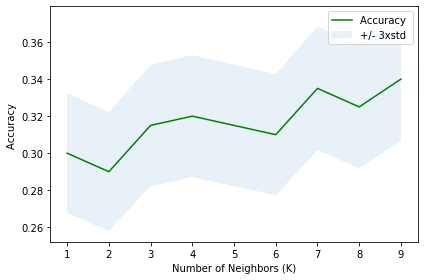

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [67]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.972972972972973 with k= 3
